<a href="https://colab.research.google.com/github/pskarthick15/-Machine-Learning/blob/main/ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd

In [50]:
from google.colab import files
uploaded = files.upload()

Saving datafile (4).xls to datafile (4) (1).xls


In [51]:
import io
df=pd.read_excel(io.BytesIO(uploaded['datafile (4).xls']))
df

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,S.No,Year,Months,Actual,Normal,Percentage Deviation
0,1,2015,June,49.3,27.5,79
1,2,2015,July,4.8,38.9,-88
2,3,2015,August,74.1,57.6,29
3,4,2015,September,99.4,105.8,-6
4,Total,2015,South West Monsoon,227.6,229.8,-1
5,5,2015,October,127.3,158.9,-20
6,6,2015,November,241.6,110.5,119
7,7,2015,December,21.5,45.2,-52
8,Total,2015,North East Monsoon,390.4,314.6,24
9,8,2016,January,0.0,6.6,-100


In [52]:
df=df.drop(labels=[4,8,11,15,16], axis=0)

In [53]:
df

,S.No,Year,Months,Actual,Normal,Percentage Deviation
0,1,2015,June,49.3,27.5,79
1,2,2015,July,4.8,38.9,-88
2,3,2015,August,74.1,57.6,29
3,4,2015,September,99.4,105.8,-6
5,5,2015,October,127.3,158.9,-20
6,6,2015,November,241.6,110.5,119
7,7,2015,December,21.5,45.2,-52
9,8,2016,January,0.0,6.6,-100
10,9,2016,February,0.0,9.5,-100
12,10,2016,March,0.3,16.8,-98


In [64]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5,'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12 }

In [65]:
df.Months = df.Months.map(d)

In [66]:
df

,S.No,Year,Months,Actual,Normal,Percentage Deviation
0,1,2015,6,49.3,27.5,79
1,2,2015,7,4.8,38.9,-88
2,3,2015,8,74.1,57.6,29
3,4,2015,9,99.4,105.8,-6
5,5,2015,10,127.3,158.9,-20
6,6,2015,11,241.6,110.5,119
7,7,2015,12,21.5,45.2,-52
9,8,2016,1,0.0,6.6,-100
10,9,2016,2,0.0,9.5,-100
12,10,2016,3,0.3,16.8,-98


**Linear Regression(Multivariate)**

In [67]:
X = df[['Year', 'Months','Normal']]
y=df['Actual']

In [68]:
from sklearn import linear_model

In [69]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
predicted_rain = regr.predict([[2015, 6, 27.5]])


In [59]:
print(regr.coef_)

[-19.3470294    1.92626157   0.98588468]


In [60]:
print(predicted_rain)

[32.94509847]


In [ ]:
predicted_rain1 = regr.predict([[2015, 7, 38.9]])

In [ ]:
print(predicted_rain1)

[46.11044535]


In [ ]:
predicted_rain2 = regr.predict([[2019, 9, 105.8]])

In [ ]:
print(predicted_rain2)

[38.53053578]


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [78]:
print(x_test)

    Year  Months  Normal
7   2015      12    45.2
14  2016       5    81.1
5   2015      10   158.9


In [72]:
a=regr.predict(x_test)

In [73]:
print(a)

[ 61.95282667  64.51522617 170.19539127]


In [75]:
accuracy = regr.score(x_test,y_test)
print(accuracy*100,'%')

37.537604574712056 %


**AFTER FEATURE SCALING(Year)**

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scale = StandardScaler()

In [93]:
scaledX = scale.fit_transform(X)

In [82]:
print(scaledX)

[[-0.84515425 -0.14484136 -0.69363807]
 [-0.84515425  0.14484136 -0.4391739 ]
 [-0.84515425  0.43452409 -0.02176338]
 [-0.84515425  0.72420682  1.05412897]
 [-0.84515425  1.01388955  2.23939628]
 [-0.84515425  1.30357228  1.15903964]
 [-0.84515425  1.59325501 -0.29854897]
 [ 1.18321596 -1.59325501 -1.16015571]
 [ 1.18321596 -1.30357228 -1.0954236 ]
 [ 1.18321596 -1.01388955 -0.93247724]
 [ 1.18321596 -0.72420682 -0.31417396]
 [ 1.18321596 -0.43452409  0.50278994]]


In [94]:
regr_s = linear_model.LinearRegression()

In [95]:
regr_s.fit(scaledX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(scaledX,y,test_size=0.2,random_state=0)

In [97]:
a_s=regr_s.predict(x_test_s)

In [99]:
print(x_test_s)

[[-0.84515425  1.59325501 -0.29854897]
 [ 1.18321596 -0.43452409  0.50278994]
 [-0.84515425  1.01388955  2.23939628]]


In [98]:
print(a_s)

[ 61.95282667  64.51522617 170.19539127]


In [112]:
df['Adequate rain for production']=['Yes','No','Yes','Yes','Yes','No','No','No','No','No','No','Yes']

Classification using decision tree

In [113]:
df

,S.No,Year,Months,Actual,Normal,Percentage Deviation,Adequate rain for production
0,1,2015,6,49.3,27.5,79,Yes
1,2,2015,7,4.8,38.9,-88,No
2,3,2015,8,74.1,57.6,29,Yes
3,4,2015,9,99.4,105.8,-6,Yes
5,5,2015,10,127.3,158.9,-20,Yes
6,6,2015,11,241.6,110.5,119,No
7,7,2015,12,21.5,45.2,-52,No
9,8,2016,1,0.0,6.6,-100,No
10,9,2016,2,0.0,9.5,-100,No
12,10,2016,3,0.3,16.8,-98,No


In [114]:
d1={'Yes': 1, 'No': 0}

In [115]:
df['Adequate rain for production'] = df['Adequate rain for production'].map(d1)

In [116]:
df

,S.No,Year,Months,Actual,Normal,Percentage Deviation,Adequate rain for production
0,1,2015,6,49.3,27.5,79,1
1,2,2015,7,4.8,38.9,-88,0
2,3,2015,8,74.1,57.6,29,1
3,4,2015,9,99.4,105.8,-6,1
5,5,2015,10,127.3,158.9,-20,1
6,6,2015,11,241.6,110.5,119,0
7,7,2015,12,21.5,45.2,-52,0
9,8,2016,1,0.0,6.6,-100,0
10,9,2016,2,0.0,9.5,-100,0
12,10,2016,3,0.3,16.8,-98,0


In [117]:
features_class = ['Year', 'Months', 'Actual', 'Normal']

In [118]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [121]:
X_c=df[features_class]
y_c = df['Adequate rain for production']

In [125]:
print(X_c)

    Year  Months  Actual  Normal
0   2015       6    49.3    27.5
1   2015       7     4.8    38.9
2   2015       8    74.1    57.6
3   2015       9    99.4   105.8
5   2015      10   127.3   158.9
6   2015      11   241.6   110.5
7   2015      12    21.5    45.2
9   2016       1     0.0     6.6
10  2016       2     0.0     9.5
12  2016       3     0.3    16.8
13  2016       4    14.4    44.5
14  2016       5    45.1    81.1


In [126]:
print(y_c)

0     1
1     0
2     1
3     1
5     1
6     0
7     0
9     0
10    0
12    0
13    0
14    1
Name: Adequate rain for production, dtype: int64


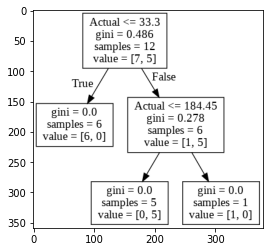

In [128]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_c, y_c)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features_class)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('decisiontree.png')

img=pltimg.imread('decisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [129]:
x_train_c,x_test_c,y_train_c,y_test_c = train_test_split(X_c,y_c,test_size=0.2,random_state=0)

In [130]:
dtree.predict(x_test_c)

array([0, 1, 1])

In [133]:
y_test_c

7     0
14    1
5     1
Name: Adequate rain for production, dtype: int64